## 0. Pseudo-code for BigQuery dataset fetching


Steps to extract the patent network:

1. import dataset
2. sort by "publication_date", select start_with(2016 to 2020) and save those starting with 2016 under 2016_patents and all to dataset_16_20
3. sort by "cpc", select start_with(G06Q30/06) and patents (with infos) under 2016_patents_cpc
4. Build Graph from nodes in 2016_patents_cpc
5. Exlude node_list from dataset_16_20


6.  for patent in dataset_16_20:

    extract patents.citation.npl_text as citations
    
    for cit in citations, node in nodelist:
        if cit == node:
            date = cit.publication
            Graph add patent as node, Graph add edge bewtween patent and node
    
    return Graph
   
        

----

## 1. Graph 

In [5]:
%matplotlib inline

import networkx as nx

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import seaborn as sns

In [6]:
# read edgelist from the txt file
Graph = nx.read_edgelist('ntw.txt')

### 1.1 General

In [7]:
print('Number of nodes: {}'.format(len(Graph.nodes)))
print('Number of edges: {}'.format(len(Graph.edges)))


Number of nodes: 4039
Number of edges: 88234


In [8]:
# infos dict initialization
Graph_infos = {}

### 1.2 Degree

In [9]:
# Degree (number of edges at each node) for all nodes in order to have the main stats (max,min,meand,median,quantile) and plot

Graph_infos['Degrees'] = dict(nx.degree(Graph))

# only values
degrees_val = [Graph_infos['Degrees'][node] for node in Graph_infos['Degrees']]

#stats
degree_min = np.min(degrees_val)
print('Min degree connection: {}'.format(degree_min))
print('')

degree_max = np.max(degrees_val)
print('Max degree connection: {}'.format(degree_max))
print('')

degree_median = np.median(degrees_val)
print('Median degree connection: {}'.format(degree_median))
print('')

degree_mean = np.mean(degrees_val)
print('Mean degree connection: {}'.format(degree_mean))
print('')

degree_u_quant = np.quantile(degrees_val,0.75)
print('75% quantile degree connection: {}'.format(degree_u_quant))
print('')

degree_l_quant = np.quantile(degrees_val,0.25)
print('25% quantile degree connection: {}'.format(degree_l_quant))
print('')

Min degree connection: 1

Max degree connection: 1045

Median degree connection: 25.0

Mean degree connection: 43.69101262688784

75% quantile degree connection: 57.0

25% quantile degree connection: 11.0



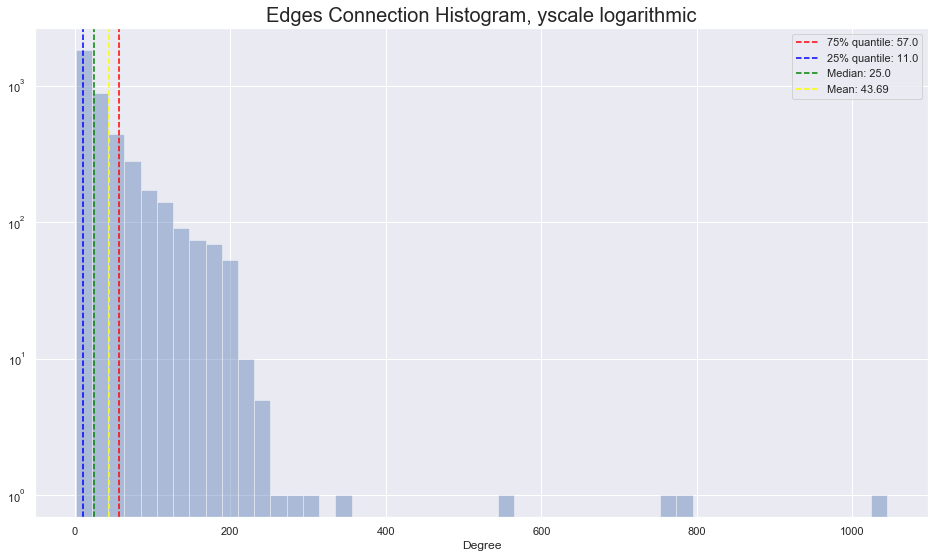

In [10]:
# Degree histogram
plt.figure(figsize=(16,9)) 
sns.set() 
 
sns.distplot(degrees_val,axlabel="Degree",kde=False)

plt.axvline(degree_u_quant, color = 'red', linestyle = '--', label = '75% quantile: {}'.format(degree_u_quant))
plt.axvline(degree_l_quant, color = 'blue', linestyle = '--', label = '25% quantile: {}'.format(degree_l_quant))
plt.axvline(degree_median, color = 'green', linestyle = '--', label = 'Median: {}'.format(degree_median))
plt.axvline(degree_mean, color = 'yellow', linestyle = '--', label = 'Mean: {}'.format(round(degree_mean,2)))
plt.legend()
plt.yscale('log')
plt.title("Edges Connection Histogram, yscale logarithmic", fontsize = 20) # for histogram title
plt.legend()

We can see on the above graph that 75% of the nodes have less than 40 edges, the rest is spread up to around 1400 for on node.

### 1.3 Clustering

In [11]:
# Calculate for each node the triangles they are involved in as well as the main stats like above
Graph_infos['Triangles'] = nx.triangles(Graph)

# values only
triangles_val = [Graph_infos['Triangles'][i] for i in Graph_infos['Triangles']]

# stats
triangles_min = np.min(triangles_val)
print('Min triangles connection from a node: {}'.format(triangles_min))
print('')
triangles_max = np.max(triangles_val)
print('Max triangles connection from a node: {}'.format(triangles_max))
print('')

triangles_median = np.median(triangles_val)
print('Median triangles connection from a node: {}'.format(triangles_median))
print('')
triangles_mean = np.mean(triangles_val)
print('Mean triangles connection from a node: {}'.format(triangles_mean))
print('')

triangles_u_quant = np.quantile(triangles_val,0.75)
print('75% quantile triangle connection from a node: {}'.format(triangles_u_quant))
print('')
triangles_l_quant = np.quantile(triangles_val,0.25)
print('25% quantile triangle connection from a node: {}'.format(triangles_l_quant))
print('')

Min triangles connection from a node: 0

Max triangles connection from a node: 30025

Median triangles connection from a node: 161.0

Mean triangles connection from a node: 1197.3334983906907

75% quantile triangle connection from a node: 831.5

25% quantile triangle connection from a node: 34.0



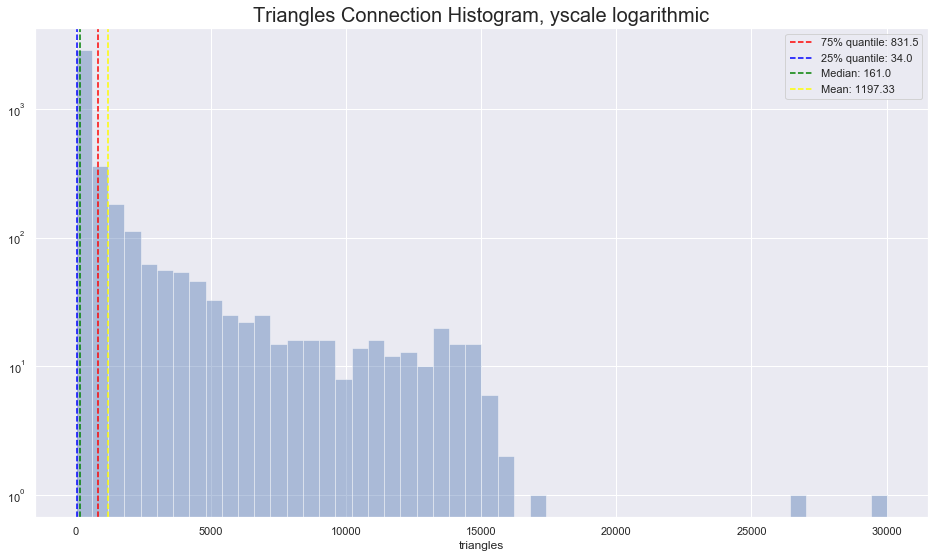

In [12]:
# plot triangle distribution
plt.figure(figsize=(16,9)) 
sns.set() 
 
sns.distplot(triangles_val,axlabel="triangles",kde=False)

plt.axvline(triangles_u_quant, color = 'red', linestyle = '--', label = '75% quantile: {}'.format(triangles_u_quant))
plt.axvline(triangles_l_quant, color = 'blue', linestyle = '--', label = '25% quantile: {}'.format(triangles_l_quant))
plt.axvline(triangles_median, color = 'green', linestyle = '--', label = 'Median: {}'.format(triangles_median))
plt.axvline(triangles_mean, color = 'yellow', linestyle = '--', label = 'Mean: {}'.format(round(triangles_mean,2)))
plt.legend()
plt.yscale('log')
plt.title("Triangles Connection Histogram, yscale logarithmic", fontsize = 20) 
plt.legend()

In [13]:
print('Graph transivity:  {}'.format(nx.transitivity(Graph)))
print('Averge Graph clustering:  {}'.format(nx.average_clustering(Graph)))

Graph transivity:  0.5191742775433075
Averge Graph clustering:  0.6055467186200876


## 2. Centrality

Here we will explore compute the different centralities in order to see later which nodes come best in which category

In [14]:
Graph_centrality = {}

### 2.1 Degree centrality

In [15]:
deg_cen = dict(nx.degree_centrality(Graph))


In [16]:
Graph_centrality['Degree Centrality'] = deg_cen

### 2.2 Closeness centrality

In [17]:
clo_cen = nx.closeness_centrality(Graph)


In [18]:
Graph_centrality['Closeness Centrality'] = clo_cen

### 2.3 Betweenness centrality

In [19]:
bw_cen = nx.betweenness_centrality(Graph)


In [20]:
Graph_centrality['Betweeness Centrality'] = bw_cen

### 2.4 PageRank Centrality

In [21]:
pr_cen = nx.pagerank(Graph)


In [38]:
Graph_centrality['Pagerank Centrality'] = pr_cen

### 2.5 Eigenvectors

In [22]:
eig_cen = nx.eigenvector_centrality(Graph)


In [23]:
Graph_centrality['Eigenvector Centrality'] = eig_cen

## 3. Ranking

Following pt. 2, let's extract the best depending on which centrality definition we have

In [24]:
# in order to sort dicitonaries
import operator

In [25]:
#list to dict function
def list_to_dict(a):
    d = {a[j][0]:a[j][1] for j in range(len(a)) }

    return d

In [26]:
# print top 10 nodes for given centrality measure
def top_print(name,centrality,n):
    
    # sort the centrality to have the best above
    ranked_list = sorted(centrality.items(),key = operator.itemgetter(1),reverse = True)
    ranked_dict = list_to_dict(ranked_list)
    print(' ')
    print("CENTRALITY MEASURE BY {}".format(name.upper()))
    for k in range(0,n):
        # depends for decimals or not
        if ranked_list[k][1] > 1:
            print("{}. {} has a centrality of {:.0F}".format(k+1,ranked_list[k][0],ranked_list[k][1]))
        else:
            print("{}. {} has a centrality of {:.5F}".format(k+1,ranked_list[k][0],ranked_list[k][1]))
        k = k+1

### 3.1 Centralities

In [39]:
#execute function
for k in Graph_centrality:
    centrality = Graph_centrality[k]
    name = k
    top_print(name,centrality,10)

 
CENTRALITY MEASURE BY DEGREE CENTRALITY
1. 107 has a centrality of 0.25879
2. 1684 has a centrality of 0.19614
3. 1912 has a centrality of 0.18697
4. 3437 has a centrality of 0.13546
5. 0 has a centrality of 0.08593
6. 2543 has a centrality of 0.07281
7. 2347 has a centrality of 0.07207
8. 1888 has a centrality of 0.06290
9. 1800 has a centrality of 0.06067
10. 1663 has a centrality of 0.05820
 
CENTRALITY MEASURE BY CLOSENESS CENTRALITY
1. 107 has a centrality of 0.45970
2. 58 has a centrality of 0.39740
3. 428 has a centrality of 0.39484
4. 563 has a centrality of 0.39391
5. 1684 has a centrality of 0.39361
6. 171 has a centrality of 0.37049
7. 348 has a centrality of 0.36992
8. 483 has a centrality of 0.36985
9. 414 has a centrality of 0.36954
10. 376 has a centrality of 0.36656
 
CENTRALITY MEASURE BY BETWEENESS CENTRALITY
1. 107 has a centrality of 0.48052
2. 1684 has a centrality of 0.33780
3. 3437 has a centrality of 0.23612
4. 1912 has a centrality of 0.22930
5. 1085 has a ce

### 3.2 Overall ranking

Let's assume we have the same weight on each centrality, and also a basic ranking system where, in each centrality, the first receives 1pt, second 2pt, third 3pt etc... and that then rank the node which sums less in all centralities to have an overall winner


In [28]:
def overall_ranking(G, G_centrality, n_top, G_infos):
    ''' G: Graph
        G_centrality: centralities dict 
        n_top (int): number of nodes to be printed
        G_infos (dict)'''
    
    centralities = list(G_centrality.keys())
    
    # dict in order to have the ranking {best node 1: 1, best node 2: 2} for each centrality
    centrality_ranked = {}
    
    # for each key in the overall_rank dict, have the ranking they have in each centrality
    overall_rank = {n: [] for n in G.nodes}

    for cen in centralities:

        ranking = sorted(G_centrality[cen].items(),key = operator.itemgetter(1),reverse = True)
        
        centrality_ranked[cen] = {ranking[n][0]: n+1 for n in range(0,len(ranking))}
        
        for node in G.nodes:
            overall_rank[node].append(centrality_ranked[cen][node])
        
    # sum the points each nodes earned in the ranking in the centralities
    total = {node: np.sum(overall_rank[node]) for node in G.nodes}
    
    # sort in order to have the n_tops nodes in increasing order
    total_ranking = sorted(total.items(),key = operator.itemgetter(1),reverse = False)
    
    top_nodes = [total_ranking[i][0] for i in range(n_top)]
    
    print('OVERALL RANKING')

        
    for i in range(len(top_nodes)):
        node = top_nodes[i]
        print('')
        print('------------------')
        print('Node: {}'.format(node))
        print('')
        print('No: {} in centrality overall ranking'.format(i+1))
        print('')
        print('Specificity:')
        print('')
        print('Number of connections: {}'.format(G_infos['Degrees'][node]))
        print('Number of triangles involved in: {}'.format(G_infos['Triangles'][node]))
        
        print('')
        for j in range(len(centralities)):
            print('No: {} in {} ranking'.format(overall_rank[node][j], str(centralities[j])))
        print
        
    return centrality_ranked, total_ranking

In [40]:
centrality_ranked,total_ranking = overall_ranking(Graph, Graph_centrality,10, Graph_infos)

OVERALL RANKING

------------------
Node: 1912

No: 1 in centrality overall ranking

Specificity:

Number of connections: 755
Number of triangles involved in: 30025

No: 3 in Degree Centrality ranking
No: 28 in Closeness Centrality ranking
No: 4 in Betweeness Centrality ranking
No: 1 in Eigenvector Centrality ranking
No: 5 in Pagerank Centrality ranking

------------------
Node: 1577

No: 2 in centrality overall ranking

Specificity:

Number of connections: 170
Number of triangles involved in: 7006

No: 140 in Degree Centrality ranking
No: 22 in Closeness Centrality ranking
No: 14 in Betweeness Centrality ranking
No: 246 in Eigenvector Centrality ranking
No: 144 in Pagerank Centrality ranking

------------------
Node: 1718

No: 3 in centrality overall ranking

Specificity:

Number of connections: 155
Number of triangles involved in: 4237

No: 194 in Degree Centrality ranking
No: 23 in Closeness Centrality ranking
No: 16 in Betweeness Centrality ranking
No: 338 in Eigenvector Centrality

## 4. Graph drawing
 
Following point 3.1, let's plot the best nodes for each centrality on the graph

In [30]:
def draw_graph_top(G,centrality_ranked,n, layout, name):
    
    plt.figure(figsize=(15,15))
    
    # draw base etwork 
    nx.draw_networkx(G, pos = layout, node_size = 30, with_labels = False, node_color = 'grey', edge_color = '0.7')
    
    # add bigger nodes in color
    
    top_nodes = list(centrality_ranked.keys())[:n]
    labels = {i: i for i in top_nodes}
    colors = ['#1ECD3F', '#0C437E', '#30F77B', '#E0016D', '#E0C6F4', '#A402CF', '#6C5020', '#014F05', '#3636DE', '#0E82F6']
    big_size = 3000
    sizes = [big_size/(i+1) for i in range(n)]
        
    nx.draw_networkx_nodes(G,pos=layout,nodelist= top_nodes, with_labels = True, node_color=colors, node_size = sizes)
        
    nx.draw_networkx_labels(G,layout, labels,font_size=16, font_color = 'white') 
    
    
    plt.title(name, fontsize = 20)
    plt.axis("off")

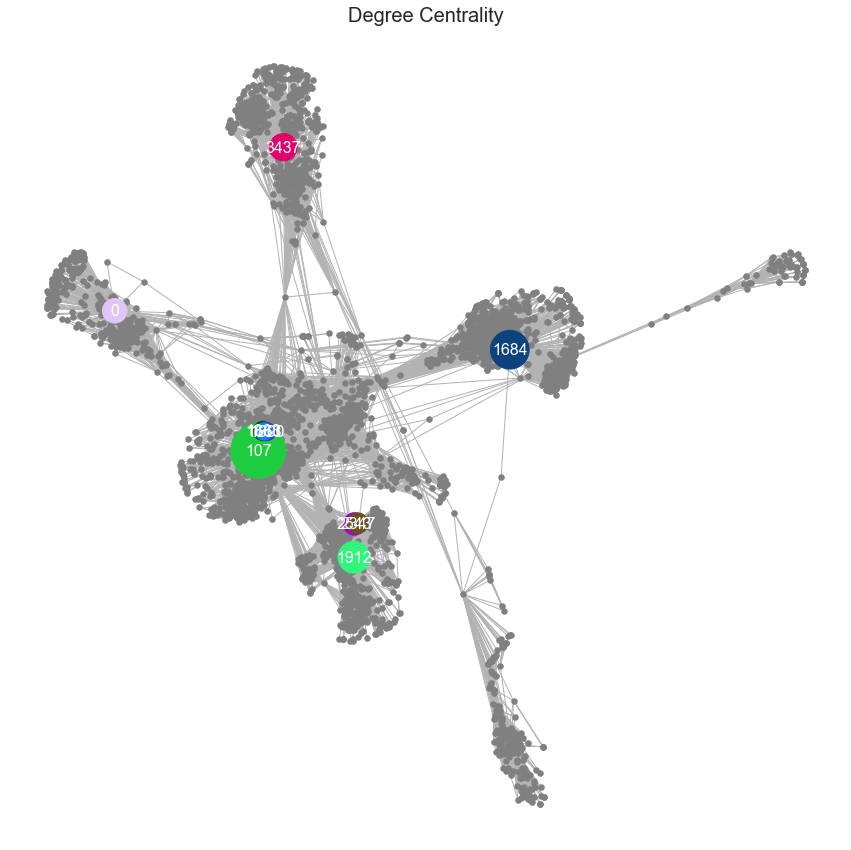

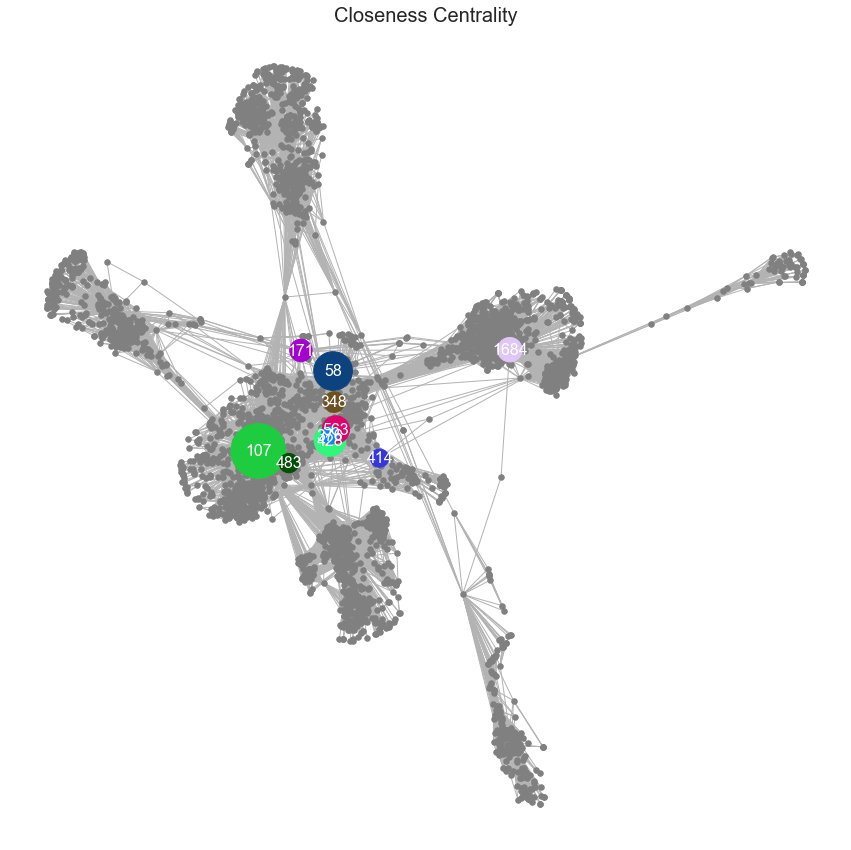

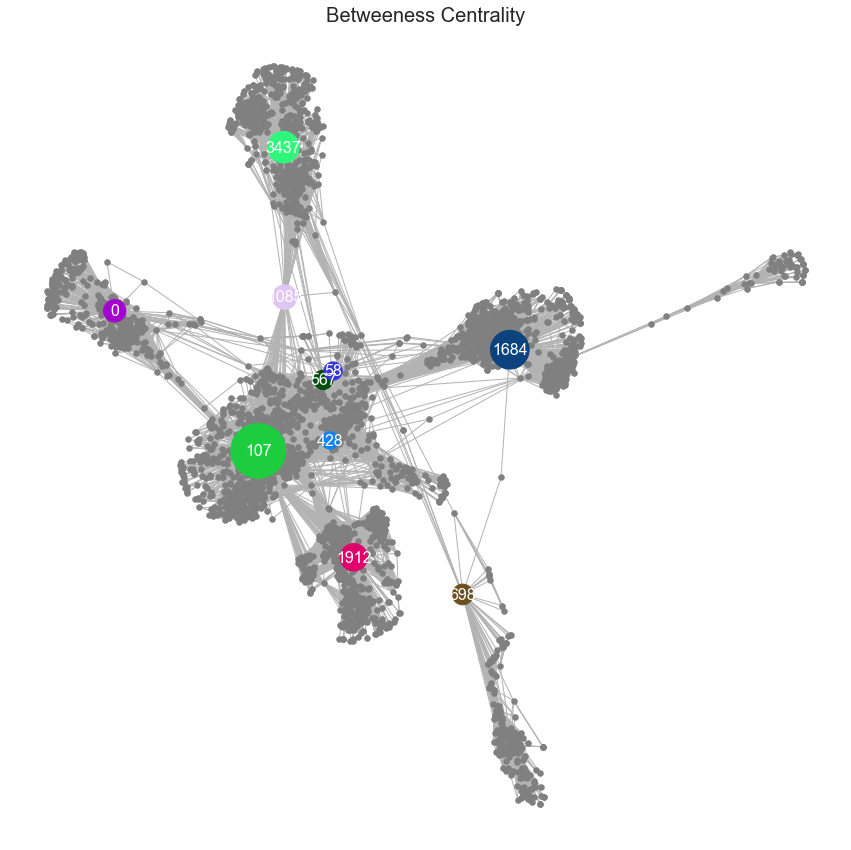

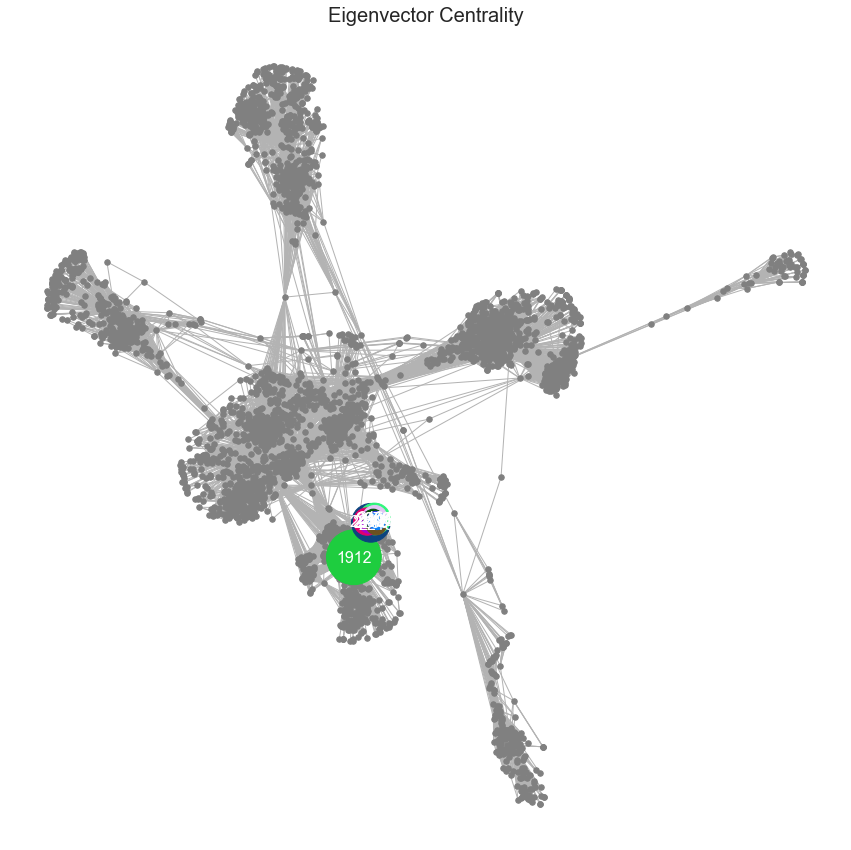

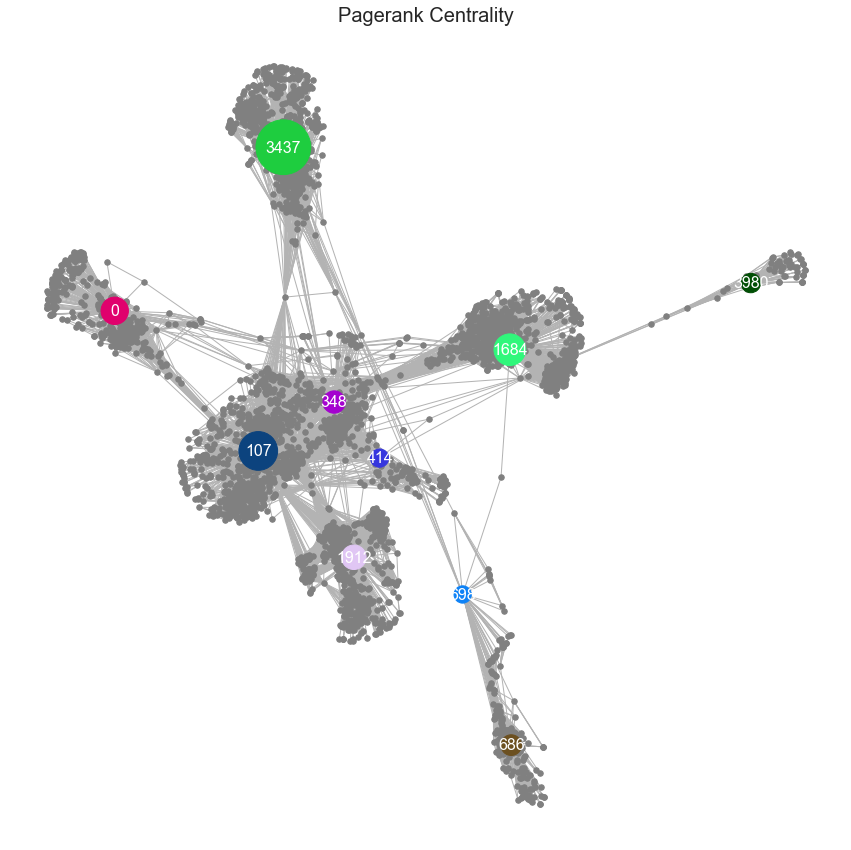

In [41]:
layout = nx.spring_layout(Graph)
for cen in Graph_centrality.keys():
    draw_graph_top(Graph,centrality_ranked[cen],10, layout, str(cen))

## 5. Community detection

Based on the nx algorithm, let it separate into partitions the nodes belonging to each community he evaluates. Since we have no other information on the nodes or edges than numbers, this is purely a theoric part

In [32]:
from networkx.algorithms.community import k_clique_communities

In [33]:
!pip install python-louvain
import community


In [34]:
# apply algorithm
partition = community.best_partition(Graph,randomize=False, random_state=0 )

In [42]:
## dictionnary with all the communities and the nodes they contain

number_of_communities = max(list(partition.values()))
communities_sorted = {}

# let's sort them to have community: list of nodes it contains
for com in range(number_of_communities+1):
    communities_sorted[com] = [n for n in Graph.nodes if partition[n] == com]


In [43]:
# list of tuple with (node, overall ranking(calculated before), community they belong in)
nodes_ranking_community = [(total_ranking[i][0],i+1,partition[total_ranking[i][0]]) for i in range(len(total_ranking))]

In [44]:
community_overall = []

# rank the community overall based on the mean overall ranking of the nodes they contain 
for com in communities_sorted:
    tot = [nodes_ranking_community[i][1] for i in range(len(nodes_ranking_community)) if nodes_ranking_community[i][2] == com]
    community_overall.append((com, np.mean(tot)))
    community_overall.sort(key=lambda tup: tup[1])

In [45]:
community_overall

[(9, 1015.4008438818565),
 (2, 1094.4675615212527),
 (5, 1323.7222222222222),
 (8, 1522.0684931506848),
 (3, 1615.7304964539007),
 (1, 1796.5754060324825),
 (6, 1823.1637931034484),
 (13, 1864.2920353982302),
 (4, 2141.9831775700936),
 (15, 2455.8947368421054),
 (10, 2516.2),
 (0, 2671.4314285714286),
 (14, 2747.157894736842),
 (7, 3051.456204379562),
 (12, 3254.839805825243),
 (11, 3548.1833333333334)]

In [46]:
# rank with first: 1, second: 2 etc...
community_ranking = {community_overall[i][0]:i+1 for i in range(len(community_overall))}

In [47]:
print('Community Ranking')
print('------------------')
for com in community_ranking:
    print('{}. Community no: {}'.format(community_ranking[com],com))

Community Ranking
------------------
1. Community no: 9
2. Community no: 2
3. Community no: 5
4. Community no: 8
5. Community no: 3
6. Community no: 1
7. Community no: 6
8. Community no: 13
9. Community no: 4
10. Community no: 15
11. Community no: 10
12. Community no: 0
13. Community no: 14
14. Community no: 7
15. Community no: 12
16. Community no: 11


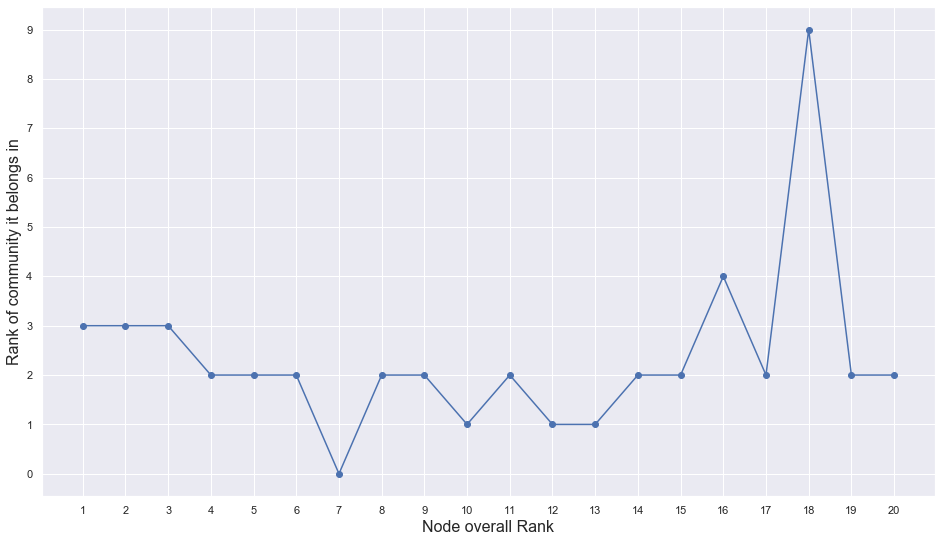

In [62]:
c = [partition[total_ranking[i][0]] for i in range(20)]
labels = [tup[0] for tup in total_ranking][:20]
plt.figure(figsize=(16,9))
plt.scatter(x = range(1,21), y = c, label=labels)
plt.plot(range(1,21),c)
plt.xticks(list(range(1,21)), list(range(1,21)))
plt.xlabel('Node overall Rank', fontsize = 16)
plt.ylabel('Rank of community it belongs in', fontsize = 16)
plt.yticks(list(range(0,max(c)+1)), list(range(0,max(c)+1)))
plt.show()

### 4.2 Overall ranking including Communities

Now we just add the communites information in the print version of the n_top nodes in overall ranking

In [64]:
def overall_ranking_w_community(G, G_centrality, n_top, G_infos, partition, community_ranking):
    centralities = list(G_centrality.keys())
    centrality_ranked = {}
    overall_rank = {n: [] for n in G.nodes}

    for cen in centralities:

        ranking = sorted(G_centrality[cen].items(),key = operator.itemgetter(1),reverse = True)
        
        centrality_ranked[cen] = {ranking[n][0]: n+1 for n in range(0,len(ranking))}
        
        for node in G.nodes:
            overall_rank[node].append(centrality_ranked[cen][node])
        
    total = {node: np.sum(overall_rank[node]) for node in G.nodes}
    
    total_ranking = sorted(total.items(),key = operator.itemgetter(1),reverse = False)
    
    top_nodes = [total_ranking[i][0] for i in range(n_top)]
    
    print('OVERALL RANKING')

        
    for i in range(len(top_nodes)):
        node = top_nodes[i]
        print('')
        print('------------------')
        print('Node: {}'.format(node))
        print('')
        print('No: {} in centrality overall ranking'.format(i+1))
        print('Belongs to community {}, which is {} in community ranking'.format(partition[node],community_ranking[partition[node]]))
        print('')
        
        print('Specificity:')
        print('')
        print('Number of connections: {}'.format(G_infos['Degrees'][node]))
        print('Number of triangles involved in: {}'.format(G_infos['Triangles'][node]))
        
        print('')
        for j in range(len(centralities)):
            print('No: {} in {} ranking'.format(overall_rank[node][j], str(centralities[j])))
        
        
    

In [65]:
overall_ranking_w_community(Graph, Graph_centrality, 10, Graph_infos, partition, community_ranking)

OVERALL RANKING

------------------
Node: 1912

No: 1 in centrality overall ranking
Belongs to community 3, which is 5 in community ranking

Specificity:

Number of connections: 755
Number of triangles involved in: 30025

No: 3 in Degree Centrality ranking
No: 28 in Closeness Centrality ranking
No: 4 in Betweeness Centrality ranking
No: 1 in Eigenvector Centrality ranking
No: 5 in Pagerank Centrality ranking

------------------
Node: 1577

No: 2 in centrality overall ranking
Belongs to community 3, which is 5 in community ranking

Specificity:

Number of connections: 170
Number of triangles involved in: 7006

No: 140 in Degree Centrality ranking
No: 22 in Closeness Centrality ranking
No: 14 in Betweeness Centrality ranking
No: 246 in Eigenvector Centrality ranking
No: 144 in Pagerank Centrality ranking

------------------
Node: 1718

No: 3 in centrality overall ranking
Belongs to community 3, which is 5 in community ranking

Specificity:

Number of connections: 155
Number of triangles 